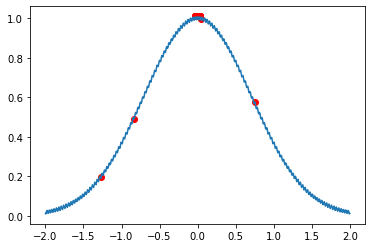

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import e

# 适应度函数
def fitness(x):
    return e**(-x**2) +0.01*np.cos(200*x)


# 个体类
class indivdual:
    def __init__(self):
        self.x = 0  # 染色体编码
        self.fitness = 0  # 适应度值

    def __eq__(self, other):
        self.x = other.x
        self.fitness = other.fitness


# 初始化种群
def initPopulation(pop, N):
    for i in range(N):
        ind = indivdual()
        ind.x = np.random.uniform(-2, 2)
        ind.fitness = fitness(ind.x)
        pop.append(ind)

# 选择过程
def selection(N):
    # 种群中随机选择2个个体进行变异（这里没有用轮盘赌，直接用的随机选择）
    return np.random.choice(N, 2)

# 结合/交叉过程
def crossover(parent1, parent2):
    child1, child2 = indivdual(), indivdual()
    child1.x = 0.9 * parent1.x + 0.1 * parent2.x
    child2.x = 0.1 * parent1.x + 0.9 * parent2.x
    child1.fitness = fitness(child1.x)
    child2.fitness = fitness(child2.x)
    return child1, child2


# 变异过程
def mutation(pop):
    # 种群中随机选择一个进行变异
    ind = np.random.choice(pop)
    # 用随机赋值的方式进行变异
    ind.x = np.random.uniform(-2, 2)
    ind.fitness = fitness(ind.x)

# 最终执行
def implement():
    # 种群中个体数量
    N = 20
    # 种群
    POP = []
    # 迭代次数
    iter_N = 500
    # 初始化种群
    initPopulation(POP, N)

# 进化过程
    for it in range(iter_N):
        a, b = selection(N)
        if np.random.random() < 0.75:  # 以0.75的概率进行交叉结合
            child1, child2 = crossover(POP[a], POP[b])
            new = sorted([POP[a], POP[b], child1, child2], key=lambda ind: ind.fitness, reverse=True)
            POP[a], POP[b] = new[0], new[1]

        if np.random.random() < 0.1:  # 以0.1的概率进行变异
            mutation(POP)

        POP.sort(key=lambda ind: ind.fitness, reverse=True)

    return POP


pop = implement()


def func(x):
    return e**(-x**2) +0.01*np.cos(200*x)

x = np.linspace(-2, 2, 500)
y = func(x)
scatter_x = np.array([ind.x for ind in pop])
scatter_y = np.array([ind.fitness for ind in pop])
plt.plot(x, y)
plt.scatter(scatter_x, scatter_y, c='r')
plt.show()